# 기본사항

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
bike = pd.read_csv("../input/bikesharing/data_1.csv")
train = pd.read_csv("../input/bike-sharing-demand/train.csv")

In [15]:
print(bike.shape)

(17379, 17)


In [16]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

결측치 대체하는 방법
* data=data.replace(".",np.nan)
* data1=data.fillna(0)

# Target 분포 살펴보기

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


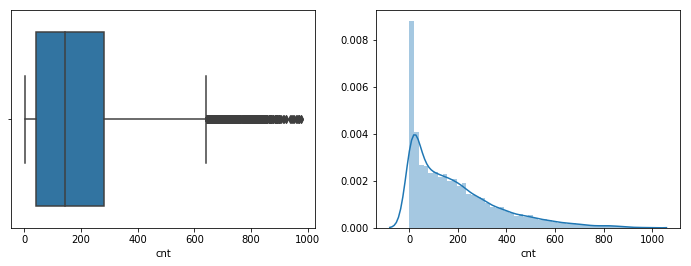

In [19]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,4)

sns.boxplot(bike["cnt"], ax=ax1)
sns.distplot(bike["cnt"], ax=ax2)

In [20]:
bike[["casual", "registered", "cnt"]].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


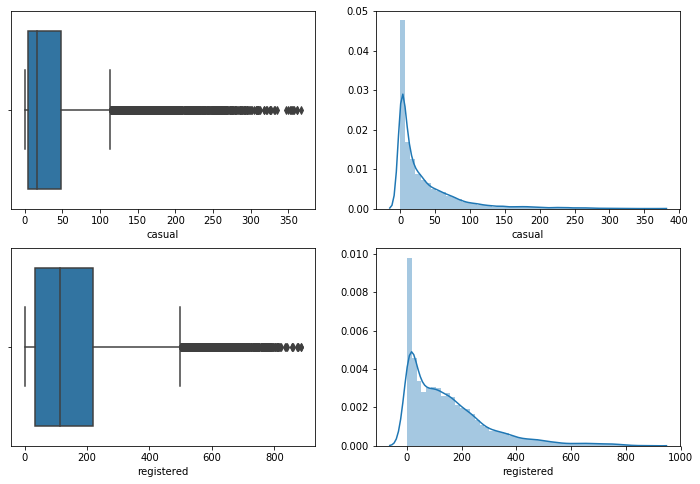

In [21]:
figure, axes = plt.subplots(nrows=2, ncols = 2)
figure.set_size_inches(12,8)

sns.boxplot(bike["casual"], ax=axes[0][0])
sns.distplot(bike["casual"], ax=axes[0][1])
sns.boxplot(bike["registered"], ax=axes[1][0])
sns.distplot(bike["registered"], ax=axes[1][1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


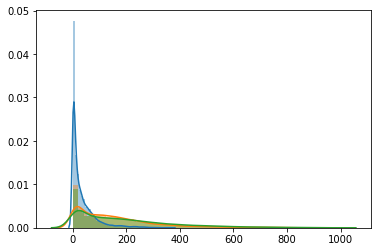

In [22]:
sns.distplot(bike[["casual"]])
sns.distplot(bike[["registered"]])
sns.distplot(bike[["cnt"]])
plt.show()

* casual과 registered의 분포는 확실히 다름
* registered의 분포와 cnt의 분포는 비슷해보임

In [23]:
from scipy.stats import ttest_ind
ttest_ind(bike[["casual"]], bike[["registered"]], equal_var = False)

Ttest_indResult(statistic=array([-97.81332644]), pvalue=array([0.]))

* p-value가 매우 작으므로 H0: casual=registered 라는 귀무가설을 높은 확률로 기각
* 따라서 두개의 분포는 다르다

casual과 registered 각각을 고려한 모형을 만드는 것을 목적으로 함!! 

# 변수 변환
* temp, atemp, humidity, windspeed = normalization 함 (0<z<1, 범위 사이가 되도록)
* year = 2011, 2012 / yr = 0, 1
* 4season = 4계절에 맞게끔 변환

In [24]:
def normalize(x):
    train[x] = (train[x] - train[x].min()) / (train[x].max() - train[x].min())
    return train[x].describe()

In [25]:
normalize("temp")

count    10886.000000
mean         0.483098
std          0.193917
min          0.000000
25%          0.326531
50%          0.489796
75%          0.632653
max          1.000000
Name: temp, dtype: float64

In [26]:
def year(x):
    if x == 0 :
        return 2011
    elif x == 1:
        return 2012

def season(x):
    if x in [12,1,2]:
        return 4
    elif x in [3,4,5]:
        return 1
    elif x in [6,7,8]:
        return 2
    elif x in [9,10,11]:
        return 3

In [27]:
bike["yr"] = bike["yr"].apply(year)
bike["season"] = bike["mnth"].apply(season)

In [28]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,4,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,4,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,4,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,4,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 변수들과 target 사이의 관계

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


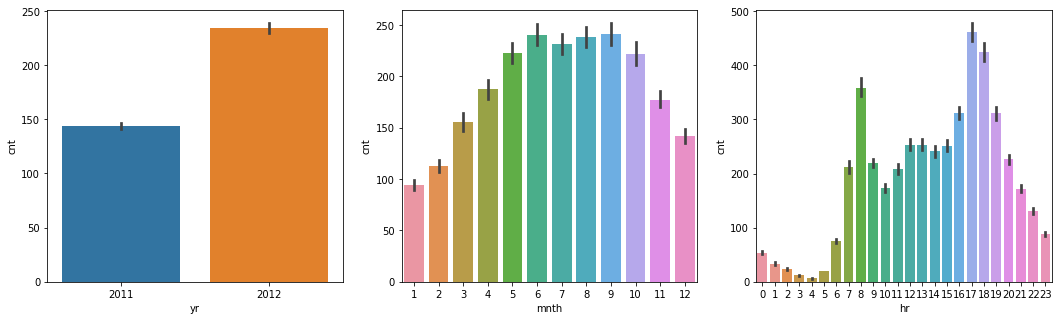

In [29]:
# 연도, 월, 시간별 데이터와 count 사이의 관계

figure, (ax1, ax2, ax3) = plt.subplots(ncols=3)
figure.set_size_inches(18,5)

sns.barplot(data=bike, x="yr", y="cnt", ax=ax1)
sns.barplot(data=bike, x="mnth", y="cnt", ax=ax2)
sns.barplot(data=bike, x="hr", y="cnt", ax=ax3)

* 2011년보다 2012년에 대여량이 월등하게 많다
* 날씨가 좋은 6월~9월에 대여량이 많다
* 8시, 17~18시의 대여량이 많다 = 출퇴근시간에 자전거를 이용한다고 유추할 수 있음

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


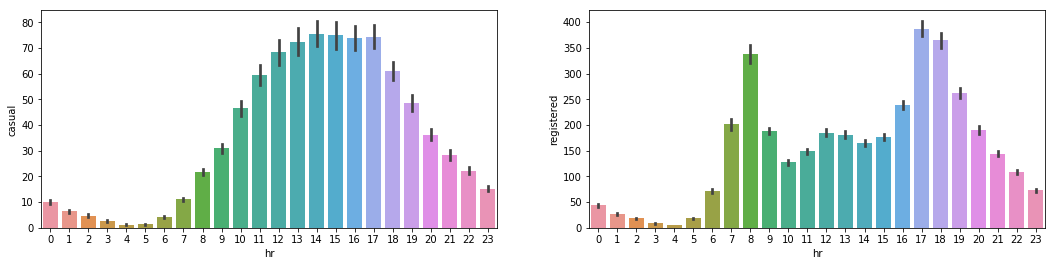

In [30]:
# 연도, 월, 시간별 데이터와 casual,registered 사이의 관계

figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=bike, x="hr", y="casual", ax=ax1)
sns.barplot(data=bike, x="hr", y="registered", ax=ax2)

* 임시사용자의 경우 오후시간대에 고르게 많다
* 등록사용자의 경우 출퇴근시간에 이용이 많다

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


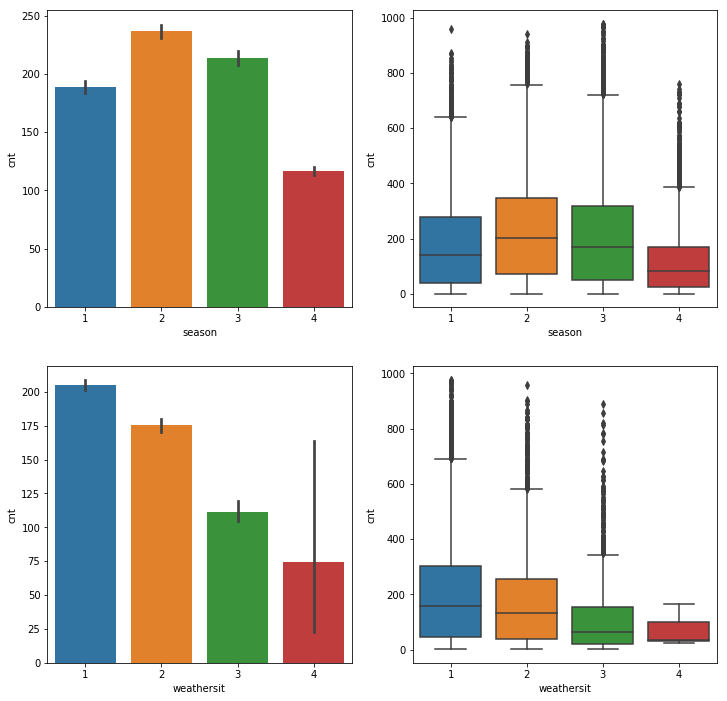

In [31]:
# 계절, weather별 데이터와 count 사이의 관계

figure, axes = plt.subplots(nrows = 2, ncols=2)
figure.set_size_inches(12,12)

sns.barplot(data=bike, x='season', y="cnt", ax=axes[0][0])
sns.boxplot(data=bike, x="season", y="cnt", ax=axes[0][1])
sns.barplot(data=bike, x='weathersit', y="cnt", ax=axes[1][0])
sns.boxplot(data=bike, x='weathersit', y="cnt", ax=axes[1][1])

날씨가 좋을 때 많이 이용함!
* 날씨가 좋은 여름, 가을, 봄에 많이 이용함
* 날씨가 좋은 때(1) 이용량이 많고 -> 숫자가 커질수록(날씨가 나빠질수록) 이용량 감소

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


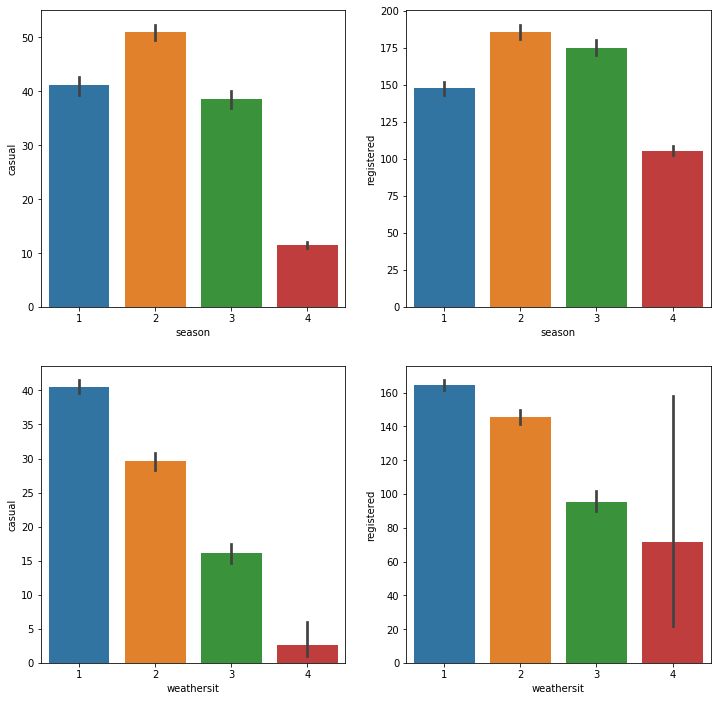

In [32]:
figure, axes = plt.subplots(nrows = 2, ncols=2)
figure.set_size_inches(12,12)

sns.barplot(data=bike, x='season', y="casual", ax=axes[0][0])
sns.barplot(data=bike, x="season", y="registered", ax=axes[0][1])
sns.barplot(data=bike, x='weathersit', y="casual", ax=axes[1][0])
sns.barplot(data=bike, x='weathersit', y="registered", ax=axes[1][1])

* 날씨가 좋을 때는 분포 차이가 크게 없지만,
* 날씨가 나쁠 때에도 불구하고 registered 사용자들은 자전거를 대여함

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


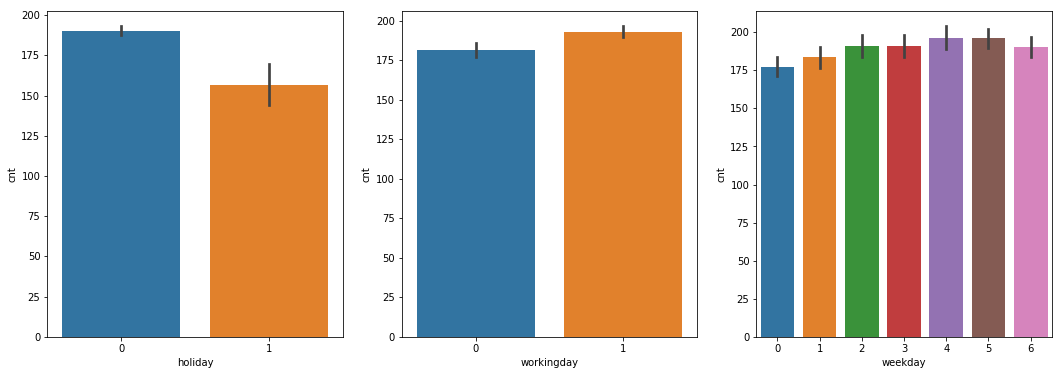

In [33]:
# holiday, weekday, workingday와 자전거 대여량 비교

figure, axes = plt.subplots(ncols=3)
figure.set_size_inches(18, 6)

sns.barplot(data=bike, x='holiday', y="cnt", ax=axes[0])
sns.barplot(data=bike, x="weekday", y="cnt", ax=axes[2])
sns.barplot(data=bike, x='workingday', y="cnt", ax=axes[1])

* 휴일보다 근무일에 대여량이 많다 = 출퇴근시간에 이용하는 사용자들이 조금 더 많다
* (애초에 registered 사용자의 경우 casual 사용자의 2배정도임)
* 요일에 따른 분포는 비슷하다 

In [34]:
# 온도, 체감온도, 습도, 풍속
bike[["temp", "atemp", "hum", "windspeed"]].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


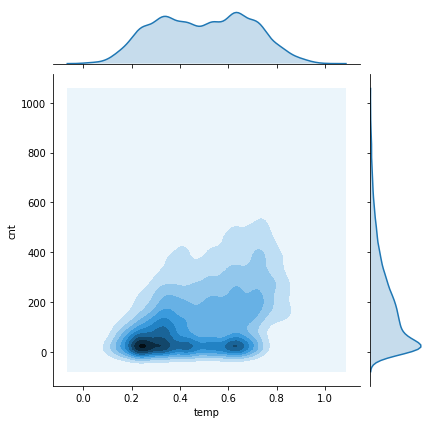

In [35]:
sns.jointplot(x="temp", y="cnt", data = bike, kind="kde")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


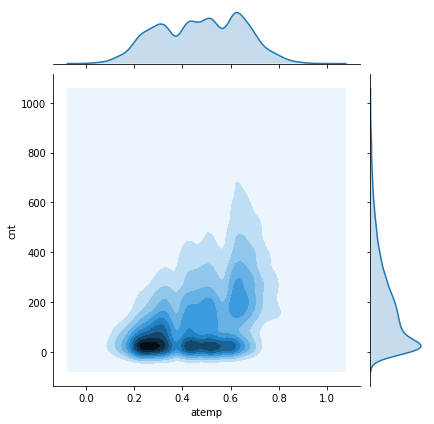

In [36]:
sns.jointplot(x="atemp", y="cnt", data = bike, kind="kde")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


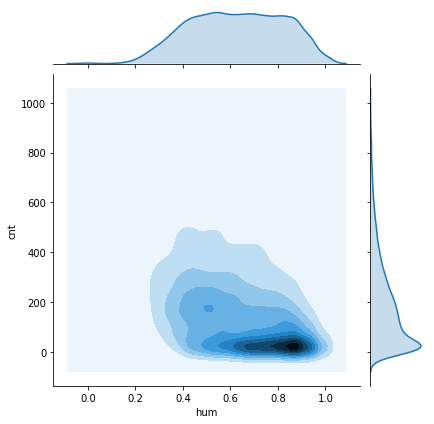

In [37]:
sns.jointplot(x="hum", y="cnt", data = bike, kind="kde")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


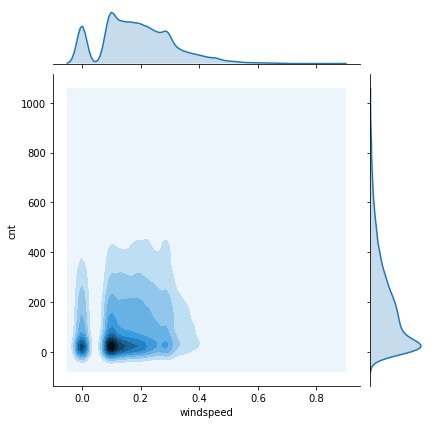

In [38]:
sns.jointplot(x="windspeed", y="cnt", data = bike, kind="kde")

In [39]:
# 분포를 보면 풍속에 0값이 많아보이므로 0값을 예측하여 대체해주기로 함

bikewind0 = bike.loc[bike["windspeed"]==0]
bikewindnot0 = bike.loc[bike["windspeed"]!=0]
print(bikewind0.shape, bikewindnot0.shape)

(2180, 17) (15199, 17)


In [40]:
from sklearn.neighbors import KNeighborsClassifier

def predict_wind(data):
    datawind0 = data.loc[data["windspeed"] == 0]
    datawindnot0 = data.loc[data["windspeed"] != 0]
    
    wcol = ["season", "mnth", "weathersit", "temp", "atemp", "hum"]
    
    datawindnot0["windspeed"] = datawindnot0["windspeed"].astype("str")
    
    rfmodel = KNeighborsClassifier()
    rfmodel.fit(datawindnot0[wcol], datawindnot0["windspeed"])
    
    wind0values = rfmodel.predict(X=datawind0[wcol])
    
    predictwind0 = datawind0
    predictwindnot0 = datawindnot0
    
    predictwind0["windspeed"] = wind0values
    
    data = predictwindnot0.append(predictwind0)
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis=1)
    
    return data

In [41]:
w_bike = predict_wind(bike)
w_bike["windspeed"].describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    17379.000000
mean         0.207735
std          0.104815
min          0.089600
25%          0.134300
50%          0.194000
75%          0.283600
max          0.850700
Name: windspeed, dtype: float64

In [42]:
bike["windspeed"] = w_bike["windspeed"]

bikewind0 = bike.loc[bike["windspeed"]==0]
bikewindnot0 = bike.loc[bike["windspeed"]!=0]
print(bikewind0.shape, bikewindnot0.shape)

(0, 17) (17379, 17)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


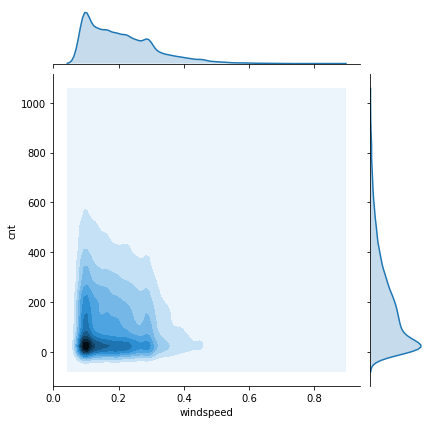

In [43]:
sns.jointplot(x="windspeed", y="cnt", data = bike, kind="kde")

* 결측치 대체: RandomForestClassifier(), KNeighborsClassifier() 사용함 
* 0애 몰려있던 분포값들이 고르게 퍼진 것을 볼 수 있음

In [44]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,4,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0896,3,13,16
1,2,2011-01-01,4,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.2537,8,32,40
2,3,2011-01-01,4,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.2836,5,27,32
3,4,2011-01-01,4,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.2836,3,10,13
4,5,2011-01-01,4,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.2985,0,1,1


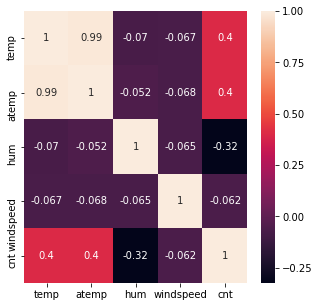

In [45]:
# temp, atemp, hum, windspeed 각각 변수들간 상관관계 있는지 파악

weather = bike[["temp","atemp","hum","windspeed","cnt"]]
plt.figure(figsize=(5,5))
sns.heatmap(weather.corr(), annot=True)
plt.show()

* temp(온도)와 atemp(체감온도) 사이에는 큰 상관관계가 있는 것으로 판단됨 

In [46]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


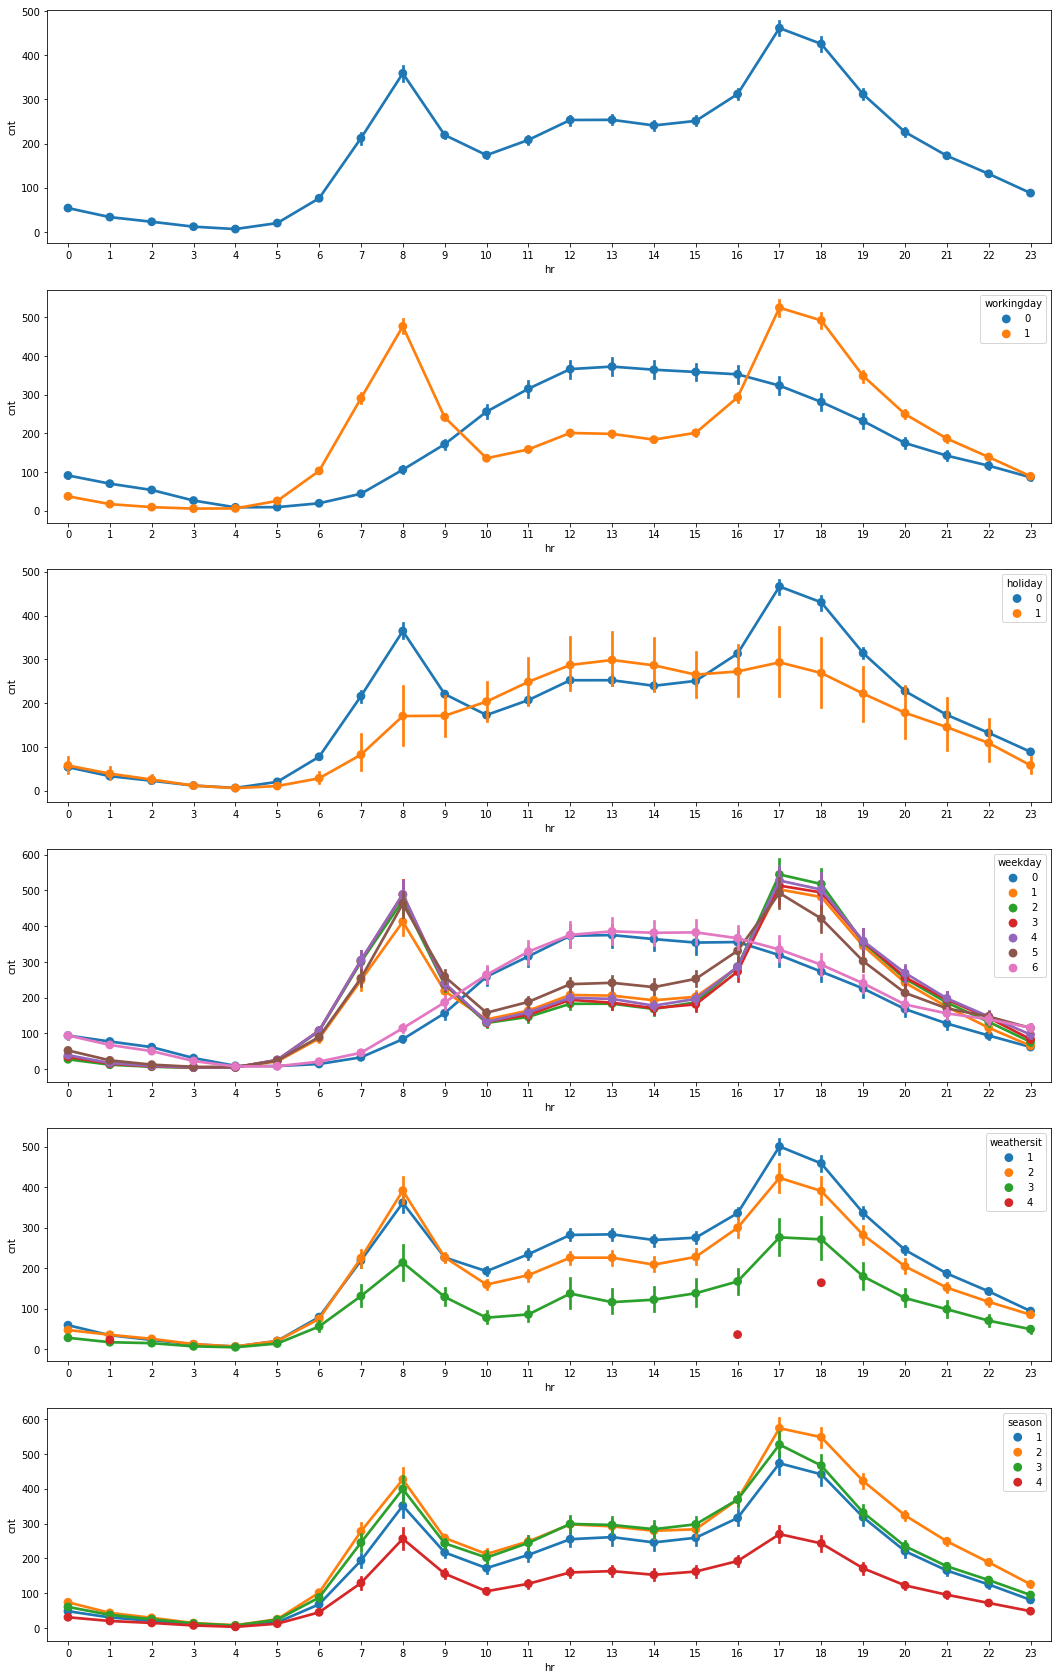

In [47]:
# 시간에 따른 대여량

fig, axes = plt.subplots(nrows = 6)
fig.set_size_inches(18,30)

sns.pointplot(data=bike, x="hr", y="cnt", ax=axes[0])
sns.pointplot(data=bike, x="hr", y="cnt", hue = "workingday", ax=axes[1])
sns.pointplot(data=bike, x="hr", y="cnt", hue = "holiday", ax=axes[2])
sns.pointplot(data=bike, x="hr", y="cnt", hue = "weekday", ax=axes[3])
sns.pointplot(data=bike, x="hr", y="cnt", hue = "weathersit", ax=axes[4])
sns.pointplot(data=bike, x="hr", y="cnt", hue = "season", ax=axes[5])

* 전체적인 분포의 모양은 모두 비슷한 편 
* 특히 7~8시, 17~18시에 이용량이 많다 = 출퇴근시간
* 출퇴근하지 않는 날은 햇빛이 쨍쨍한 12시~16시에 이용량이 많다
* 특히 holiday의 경우 신뢰구간의 길이가 다른 점들보다 훨씬 넓은데, 이는 holiday의 사용량이 매우 변화가 크고, 시간에 따라 고르게 분포한다고 추정할 수 있다 

* workingday(1)와 weekday(1~5)의 분포는 매우 똑같아보임 -> 둘 중의 하나의 변수만 사용
* weathersit: 날씨가 좋을수록 대여량이 더 많고, 날씨가 나쁘면 대여 별로 안 함 
* season: 여름->가을->봄 순으로 모두 대여량이 전반적으로 겨울보다 많은 편 

In [48]:
bike[["holiday", "weekday", "workingday"]].corr()

,holiday,weekday,workingday
holiday,1.000000,-0.102088,-0.252471
weekday,-0.102088,1.000000,0.035955
workingday,-0.252471,0.035955,1.000000


In [49]:
# workingday의 경우 weekday(1~5)의 분포와 비슷해 보이는데, 
# 이는 상관관계에서 직접적으로 나타나지 않음 -> 변수 변환을 하고 따져봐야 하기 때문

def workingday(x):
    if x in [1,2,3,4,5]:
        return 1
    elif x in [0,6]:
        return 0

bike["dummywork"] = bike.weekday.apply(workingday)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dummywork
0,1,2011-01-01,4,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0896,3,13,16,0
1,2,2011-01-01,4,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.2537,8,32,40,0
2,3,2011-01-01,4,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.2836,5,27,32,0
3,4,2011-01-01,4,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.2836,3,10,13,0
4,5,2011-01-01,4,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.2985,0,1,1,0


In [50]:
bike[["workingday", "dummywork"]].corr()

,workingday,dummywork
workingday,1.000000,0.934105
dummywork,0.934105,1.000000


* workingday 하나의 변수만 사용하기로 결정함 

# y 이상치 제거
로버스트 통계량을 사용하여 y값의 이상치를 제거해준다 

In [51]:
bike_no_outlier = bike.copy()
bike_no_outlier = bike[np.abs(bike["cnt"] - bike["cnt"].mean()) <= 3*bike["cnt"].std()]
bike_no_outlier.shape[0] / bike.shape[0]

0.9859600667472237

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-3.94171042, -3.72363151, -3.60421718, ...,  3.60421718,
          3.72363151,  3.94171042]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.5971457 ,
         6.59850903])),
 (1.3490324630370492, 4.544366339498316, 0.9601811537292394))

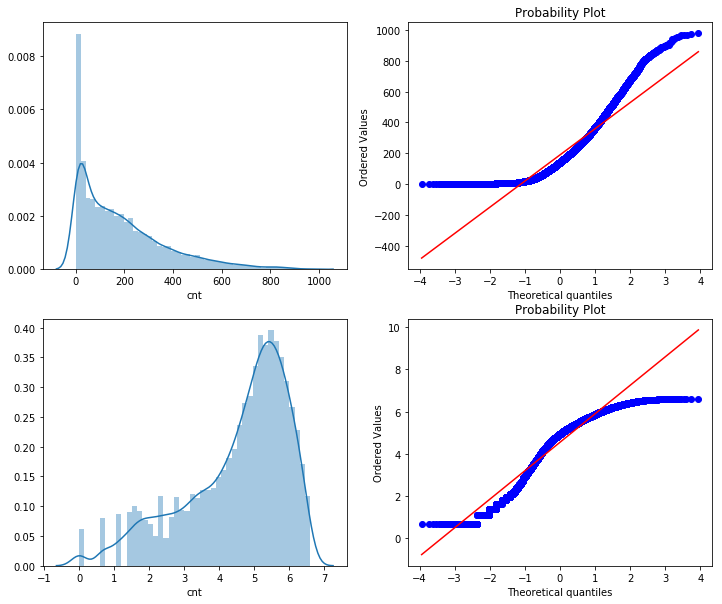

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.distplot(bike["cnt"], ax=axes[0][0])
stats.probplot(bike["cnt"], dist="norm", fit=True, plot=axes[0][1])
sns.distplot(np.log(bike_no_outlier["cnt"]), ax=axes[1][0])
stats.probplot(np.log1p(bike_no_outlier["cnt"]), dist="norm", fit=True, plot=axes[1][1])

# 회귀분석 연습

y = cnt, x= temp, atemp, hum, windspeed 사용하여 회귀분석 모델 만들기

In [53]:
import statsmodels.api as sm 

X = bike[["temp", "hum", "windspeed"]]
y = np.log1p(bike[["cnt"]])

model2 = sm.OLS(y, X)
result = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 4.875e+04
Date:                Sun, 31 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:59:58   Log-Likelihood:                -32396.
No. Observations:               17379   AIC:                         6.480e+04
Df Residuals:                   17376   BIC:                         6.482e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           5.6625      0.050    113.773      0.0

In [54]:
bike_no_outlier.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'dummywork'],
      dtype='object')

# feature selection
* instant, dteday 제거
* workingday만 사용 - weekday, dummyweek 제거
* season, weathersit, yr, mnth, hr: dummy 변수로 변환
* atemp 제거

In [55]:
dropfeatures = ['instant', 'dteday', 'atemp', 'weekday', 'dummywork', 'casual', 'registered']
dummyfeatures = ['season', 'yr', 'mnth', 'hr', 'weathersit']

In [56]:
for each in dummyfeatures:
    dummies = pd.get_dummies(bike_no_outlier[each], prefix=each, drop_first = False)
    bike_no_outlier = pd.concat([bike_no_outlier, dummies], axis=1)
    
bike_no_outlier = bike_no_outlier.drop(dropfeatures, axis=1)
bike_no_outlier.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_2011,yr_2012,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,4,2011,1,0,0,0,1,0.24,0.81,0.0896,16,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,4,2011,1,1,0,0,1,0.22,0.80,0.2537,40,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4,2011,1,2,0,0,1,0.22,0.80,0.2836,32,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2011,1,3,0,0,1,0.24,0.75,0.2836,13,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,2011,1,4,0,0,1,0.24,0.75,0.2985,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
bike_no_outlier.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_2011', 'yr_2012', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

In [58]:
bike_no_outlier = bike_no_outlier.drop(dummyfeatures, axis=1)
bike_no_outlier.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_2011', 'yr_2012', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [59]:
bike_no_outlier["cnt"] = np.log1p(bike_no_outlier["cnt"])
bike_no_outlier.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_2011,yr_2012,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0896,2.833213,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0.22,0.80,0.2537,3.713572,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0.22,0.80,0.2836,3.496508,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0.24,0.75,0.2836,2.639057,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0.24,0.75,0.2985,0.693147,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# modeling

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [61]:
x_train,x_test,y_train,y_test=train_test_split(bike_no_outlier.drop('cnt',axis=1),bike_no_outlier['cnt'],test_size=0.3)

In [62]:
def rmsle(pred, actual):
    pred_val = np.array(pred)
    act_val = np.array(actual)
    
    log_predict = np.log(pred_val + 1)
    log_actual = np.log(act_val + 1)
    cal = (log_predict - log_actual) ** 2 
    
    return np.sqrt(np.mean(cal))

In [63]:
model1 = LinearRegression(normalize=True)
model1.fit(x_train, y_train)
print("Accuracy: {}, RMSLE: {}".format(model1.score(x_test, y_test), rmsle(y_test, model1.predict(x_test))))

Accuracy: 0.8191554319552026, RMSLE: 0.14432580323301403


In [64]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
print("Accuracy: {}, RMSLE: {}".format(model2.score(x_test, y_test), rmsle(y_test, model2.predict(x_test))))

Accuracy: 0.8693422379037278, RMSLE: 0.13082710665210295


In [65]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)
print("Accuracy: {}, RMSLE: {}".format(model3.score(x_test, y_test), rmsle(y_test, model3.predict(x_test))))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9223521581101847, RMSLE: 0.10039574112974459


In [66]:
model4 = KNeighborsRegressor()
model4.fit(x_train, y_train)
print("Accuracy: {}, RMSLE: {}".format(model4.score(x_test, y_test), rmsle(y_test, model4.predict(x_test))))

Accuracy: 0.8467944354892053, RMSLE: 0.13848065691094993
